In [33]:
using QuantumOptics
using Plots

In [34]:
# A qubit has to be creates as a spin-1/2 system.  
b = SpinBasis(1//2)

# Initial state.
ψ0 = spindown(b) ⊗ spindown(b)

# Parameters.
ωA = 1.
ωB = 1.
ΩA = 0.
ΩB = 1.
γ = 1
g = 0.1

# Hamiltonian.
H = ΩA * sigmax(b) ⊗ identityoperator(b) + ΩB * identityoperator(b) ⊗ sigmax(b) + ωA * sigmaz(b) ⊗ identityoperator(b) + ωB * identityoperator(b) ⊗ sigmaz(b)
H += g * (sigmap(b) ⊗ sigmam(b) + sigmam(b) ⊗ sigmap(b))

# Collapse operators.
J1 = sqrt(γ) * identityoperator(b) ⊗ sigmam(b)

Operator(dim=4x4)
  basis: [Spin(1/2) ⊗ Spin(1/2)]sparse([3, 4], [1, 2], ComplexF64[1.0 + 0.0im, 1.0 + 0.0im], 4, 4)

In [35]:
dt = 0.01
t_final = 50

t_span = 0:dt:t_final

result = timeevolution.mcwf(t_span,  ψ0, H, [J1], display_jumps=true);

In [36]:
times = result[1]
states_at_times = result[2]
jump_times = result[3]
jump_channels = result[4]

3-element Vector{Int64}:
 1
 1
 1

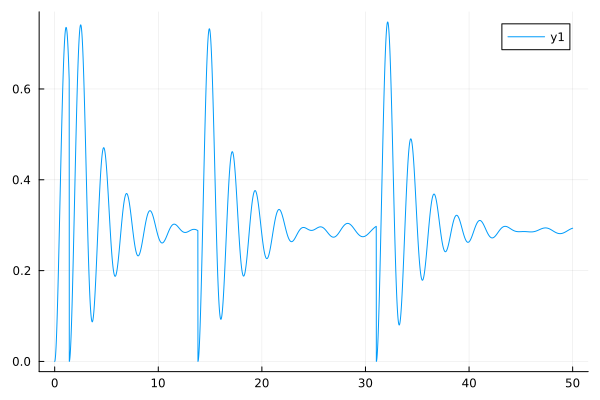

In [40]:
v_expectations = []
obs = identityoperator(b) ⊗ (sigmaz(b) + identityoperator(b))
for n_t in eachindex(t_span)
    ψ = states_at_times[n_t]
    expectation = expect(obs, ψ)
    push!(v_expectations, expectation)
end

plot(t_span, v_expectations)